<a href="https://colab.research.google.com/github/Chathuwa99/Bank-Deposit-Prediction-Project/blob/main/Bank_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#create data drame to read data set
data_set_3 = pd.read_csv('/content/Feature-Engineered Bank Data Set (3).csv')

In [ ]:
data_set_3.head()

,age,default,balance,housing,loan,day,duration,campaign,pcontact,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,44,0,29,1,0,5,151,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,33,0,2,1,1,5,76,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,35,0,231,1,0,5,139,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
data_set_3.tail()

,age,default,balance,housing,loan,day,duration,campaign,pcontact,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success,poutcome_unknown
44918,51,0,825,0,0,17,977,3,0,0,...,0,0,0,0,0,1,0,0,0,1
44919,71,0,1729,0,0,17,456,2,0,0,...,0,0,0,0,0,1,0,0,0,1
44920,72,0,5715,0,0,17,1127,5,1,3,...,0,0,0,0,0,1,0,0,1,0
44921,57,0,668,0,0,17,508,4,0,0,...,0,0,0,0,0,1,0,0,0,1
44922,37,0,2971,0,0,17,361,2,1,11,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
data_set_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44923 entries, 0 to 44922
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  44923 non-null  int64
 1   default              44923 non-null  int64
 2   balance              44923 non-null  int64
 3   housing              44923 non-null  int64
 4   loan                 44923 non-null  int64
 5   day                  44923 non-null  int64
 6   duration             44923 non-null  int64
 7   campaign             44923 non-null  int64
 8   pcontact             44923 non-null  int64
 9   previous             44923 non-null  int64
 10  y                    44923 non-null  int64
 11  job_blue-collar      44923 non-null  int64
 12  job_entrepreneur     44923 non-null  int64
 13  job_housemaid        44923 non-null  int64
 14  job_management       44923 non-null  int64
 15  job_retired          44923 non-null  int64
 16  job_self-employed    4

# **Assign relavant features for the X and Y**

In [ ]:
 # Store 'y' in target variable
target = 'y'
Y = data_set_3[target]
X = data_set_3.drop(columns=[target])

# **Splitting the training and testing data set**

In [ ]:
# Split data into 80 % train set and 20 % test set, also spread the target values evenly between train set and test set using stratify=y
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify= Y)

# Display the count of training and testing data
print("Training data count:", X_train.shape[0])
print("Training target count:", Y_train.shape[0])
print("-"*50)
print("Testing data count:", X_test.shape[0])
print("Testing target count:", Y_test.shape[0])
print("-"*50)

# Count the number of 1s and 0s in Y_train
print(Y_train.value_counts())



Training data count: 35938
Training target count: 35938
--------------------------------------------------
Testing data count: 8985
Testing target count: 8985
--------------------------------------------------
y
0    31734
1     4204
Name: count, dtype: int64


# **Checking whether the Y_train is balanced**

In [ ]:
# Calculating propability for Y_train
p_class1 = (Y_train.value_counts() / len(Y_train))[0]
p_class2 = (Y_train.value_counts() / len(Y_train))[1]

# Check for balance
if abs(p_class1 - p_class2) <= 0.05:
    print(f'Target in Y_train is balanced\n')
else:
    print(f'Target in Y_train is still imbalanced\n')

# Print class details
if p_class1 > p_class2:
    print(f"{(Y_train.unique())[0]} is majority, ({(Y_train.value_counts())[0]}) counts and its Proportion = {round(p_class1 * 100)} %")
    print(f"{(Y_train.unique())[1]} is minority, ({(Y_train.value_counts())[1]}) counts and its Proportion = {round(p_class2 * 100)} %")
else:
    print(f"{(Y_train.unique())[1]} is majority, ({(Y_train.value_counts())[1]}) counts and its Proportion = {round(p_class2 * 100)} %")
    print(f"{(Y_train.unique())[0]} is minority, ({(Y_train.value_counts())[0]}) counts and its Proportion = {round(p_class1 * 100)} %")


Target in Y_train is still imbalanced

0 is majority, (31734) counts and its Proportion = 88 %
1 is minority, (4204) counts and its Proportion = 12 %


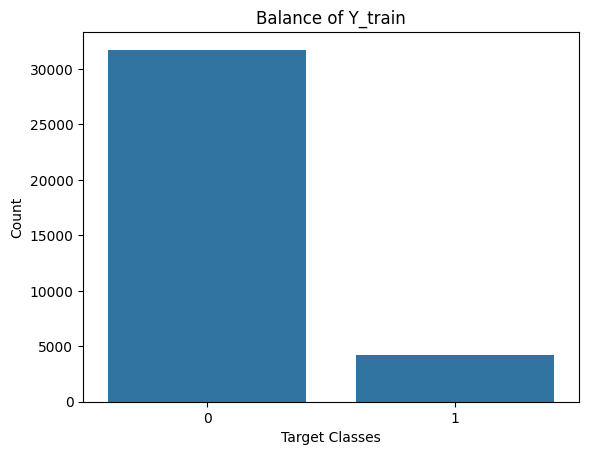

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for visualize Y_train balance
sns.countplot(x=Y_train)
plt.title("Balance of Y_train")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()


# **Applying SMOTE for balance the Y_train**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Apply SMOTE only on the training set
sm = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = sm.fit_resample(X_train, Y_train)

# Checking the class distribution after SMOTE for the training set
print("Class distribution in Y_train after SMOTE:")
print(pd.Series(Y_train_resampled).value_counts())




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution in Y_train after SMOTE:
y
0    31734
1    31734
Name: count, dtype: int64


In [ ]:
p_class1 = (pd.Series(Y_train_resampled).value_counts() / len(Y_train_resampled))[0]
p_class2 = (pd.Series(Y_train_resampled).value_counts() / len(Y_train_resampled))[1]

# Check for balance
if abs(p_class1 - p_class2) <= 0.05:
    print(f'Target in Y_train_resampled is balanced\n')
else:
    print(f'Target in Y_train_resampled is still imbalanced\n')

# Print class details
if p_class1 > p_class2:
    print(f"{(pd.Series(Y_train_resampled).unique())[0]} is majority, ({(pd.Series(Y_train_resampled).value_counts())[0]}) counts and its Proportion = {round(p_class1 * 100)} %")
    print(f"{(pd.Series(Y_train_resampled).unique())[1]} is minority, ({(pd.Series(Y_train_resampled).value_counts())[1]}) counts and its Proportion = {round(p_class2 * 100)} %")
else:
    print(f"{(pd.Series(Y_train_resampled).unique())[1]} is majority, ({(pd.Series(Y_train_resampled).value_counts())[1]}) counts and its Proportion = {round(p_class2 * 100)} %")
    print(f"{(pd.Series(Y_train_resampled).unique())[0]} is minority, ({(pd.Series(Y_train_resampled).value_counts())[0]}) counts and its Proportion = {round(p_class1 * 100)} %")

Target in Y_train_resampled is balanced

1 is majority, (31734) counts and its Proportion = 50 %
0 is minority, (31734) counts and its Proportion = 50 %


Y_train_resampled value counts:
y
0    31734
1    31734
Name: count, dtype: int64


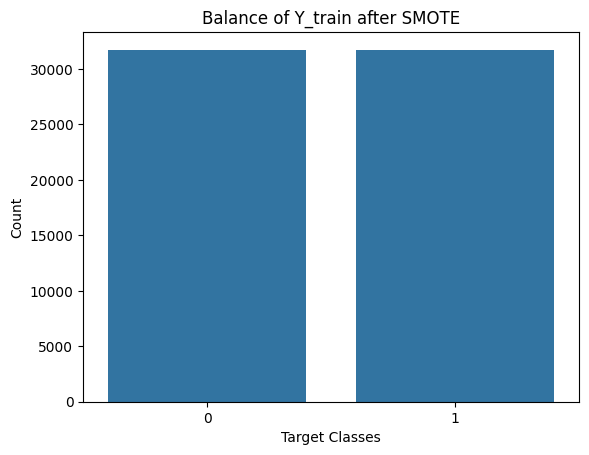

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert Y_train_resampled to a Pandas Series (if it's not already)
Y_train_resampled_series = pd.Series(Y_train_resampled)

# Check balance of Y_train_resampled
print("Y_train_resampled value counts:")
print(Y_train_resampled_series.value_counts())

# Visualize Y_train_resampled balance
sns.countplot(x=Y_train_resampled_series)
plt.title("Balance of Y_train after SMOTE")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

# Modify RandomForest parameters to reduce overfitting
rf_model = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    max_depth=10,                 # Limiting the depth of each tree
    min_samples_split=10,         # Minimum samples to split an internal node
    min_samples_leaf=5,           # Minimum samples in a leaf node
    max_features='sqrt',          # Number of features to consider for the best split
    n_estimators=100              # Number of trees in the forest
)

# Train the Random Forest model
rf_model.fit(X_train_resampled, Y_train_resampled)

# Predict on the training set
Y_train_pred = rf_model.predict(X_train_resampled)

# Predict on the test set
Y_pred = rf_model.predict(X_test)
Y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("\nClassification Report:")
clf_report = classification_report(Y_test, Y_pred)
print(clf_report)

# Calculating ROC-AUC score
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
print(f"Roc-Auc Score: {roc_auc}")

# Calculating accuracy scores
test_accuracy = accuracy_score(Y_test, Y_pred)
print("\nTest Accuracy Score:")
print(test_accuracy)

# Calculating training accuracy score
train_accuracy = accuracy_score(Y_train_resampled, Y_train_pred)
print("\nTraining Accuracy Score:")
print(train_accuracy)


Confusion Matrix:
[[7284  650]
 [ 397  654]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7934
           1       0.50      0.62      0.56      1051

    accuracy                           0.88      8985
   macro avg       0.72      0.77      0.74      8985
weighted avg       0.90      0.88      0.89      8985

Roc-Auc Score: 0.9060850973912514

Test Accuracy Score:
0.8834724540901503

Training Accuracy Score:
0.9344394025335602


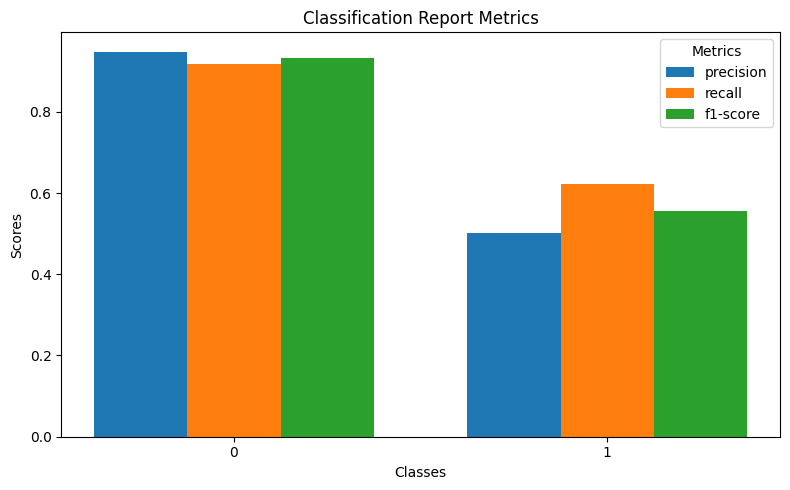

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report


clf_report = classification_report(Y_test, Y_pred, output_dict=True)

# Extract class names and metrics
classes = list(clf_report.keys())[:-3]  # Ignoring 'accuracy', 'macro avg', 'weighted avg'
metrics = ['precision', 'recall', 'f1-score']

# Preparing data for plotting
values = {metric: [clf_report[cls][metric] for cls in classes] for metric in metrics}

# Plot grouped bar chart
x = np.arange(len(classes))  # Class indices
width = 0.25  # Bar width

plt.figure(figsize=(8, 5))

for i, metric in enumerate(metrics):
    plt.bar(x + i * width, values[metric], width, label=metric)

# Add labels, title, and legend
plt.xticks(x + width, classes, )
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.legend(title='Metrics')
plt.tight_layout()

# Show the plot
plt.show()


# **Hyperparameter Tuning**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the training data (X_train)
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Apply StandardScaler to the test data (X_test)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', None],
    'bootstrap': [True, False],
}

# Setting up RandomizedSearchCV with the Random Forest model
random_search = RandomizedSearchCV(estimator=rf_classifier,
                                   param_distributions=param_grid,
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fitting RandomizedSearchCV to the resampled and scaled training data
random_search.fit(X_train_scaled, Y_train_resampled)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters Found: ", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

Best Parameters Found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'class_weight': None, 'bootstrap': False}


In [ ]:
print("Model Accuracy after Hyperparameter tunning")
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

# Generate and display classification report
clf_report = classification_report(Y_test, Y_pred)
print("\nClassification Report:")
print(clf_report)

# Calculate and display ROC-AUC score
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
print(f"Roc-Auc Score: {roc_auc}")

# Calculate and display accuracy score
test_accuracy = accuracy_score(Y_test, Y_pred)
print("\nTest Accuracy Score:")
print(test_accuracy)

# Calculate and display training accuracy
train_accuracy = accuracy_score(Y_train_resampled, Y_train_pred)
print("\nTraining Accuracy Score:")
print(train_accuracy)

Model Accuracy after Hyperparameter tunning

Confusion Matrix:
[[7284  650]
 [ 397  654]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7934
           1       0.50      0.62      0.56      1051

    accuracy                           0.88      8985
   macro avg       0.72      0.77      0.74      8985
weighted avg       0.90      0.88      0.89      8985

Roc-Auc Score: 0.9060850973912514

Test Accuracy Score:
0.8834724540901503

Training Accuracy Score:
0.9344394025335602


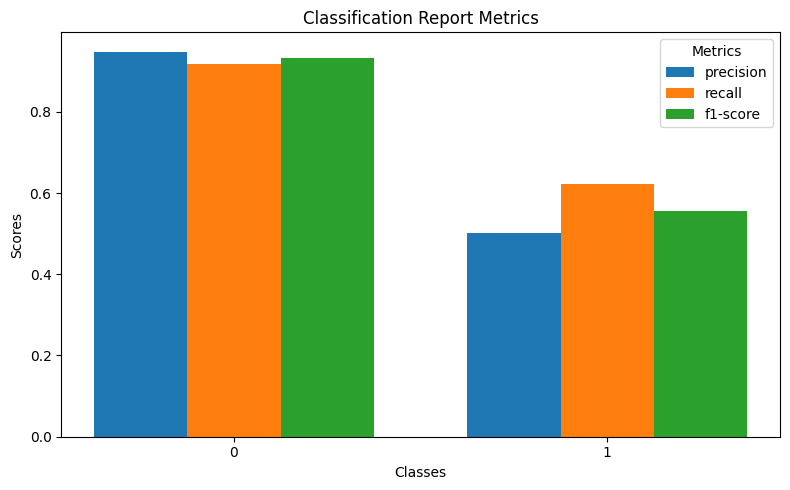

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report


clf_report = classification_report(Y_test, Y_pred, output_dict=True)

# Extract class names and metrics
classes = list(clf_report.keys())[:-3]  # Ignore 'accuracy', 'macro avg', 'weighted avg'
metrics = ['precision', 'recall', 'f1-score']

# Preparing data for plotting
values = {metric: [clf_report[cls][metric] for cls in classes] for metric in metrics}

# Plot grouped bar chart
x = np.arange(len(classes))  # Class indices
width = 0.25  # Bar width

plt.figure(figsize=(8, 5))

for i, metric in enumerate(metrics):
    plt.bar(x + i * width, values[metric], width, label=metric)

# Namimg labels, title, and legend
plt.xticks(x + width, classes, )
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.legend(title='Metrics')
plt.tight_layout()

# Show the plot
plt.show()

